In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


## Excluding unwanted columns

In [3]:
movies=df.copy()
movies=movies.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


### Representation of values from the above data

#### 0 = not bought

#### 1 = bought

In [4]:
movies.shape

(10, 10)

In [5]:
movies.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


### Since the data is already in the form of 0s and 1s, no need of performimg one hot encoding / data preprocessing.

# APRIORI ALGORITHM

## for minimum support 0.3

In [7]:
# gives all the items sets
frequent_sets=apriori(movies,min_support=0.3,use_colnames=True)
frequent_sets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Sixth Sense, Gladiator)"


In [8]:
frequent_sets.shape

(7, 2)

In [9]:
pd.set_option('display.max_columns', None)

# ASSOCIATION RULES

## With lift ratio

In [10]:
rules_l=association_rules(frequent_sets,metric='lift',min_threshold=1)
rules_l.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
11,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


### best association rule with lift ratio metric

*Among 4 & 5 which has same lift ratio, 
* **buys(X,(Patriot)) => buys(X,(Gladiator))** has highest confidence.

*Hence, **5 is the best association rule**  among 4 & 5*

### 2nd best association rule with lift ratio metric 

*Among 8 & 9 which has same lift ratio, 
* **buys(X,(Patriot, Sixth Sense)) => buys(X,(Gladiator))** has highest confidence.

*Hence, **8 is the best association rule**  among 8 & 9*

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With confidence

In [11]:
rules_c=association_rules(frequent_sets,metric='confidence',min_threshold=0.5)
rules_c.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


### best association rule with 'confidence' metric

*Among 5 & 8 which has same confidence,*
* **buys(X,(Patriot)) => buys(X,(Gladiator))** has highest support.

*Hence, **5 is the best association rule**  among 5 & 8*

### 2nd best association rule with 'confidence' metric 
 
* **buys(X,(Gladiator)) => buys(X,(Patriot))** has highest confidence.

**Hence,4 is the best association rule**

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With Support metric

In [12]:
rules_s=association_rules(frequent_sets,metric='support',min_threshold=0.1)
rules_s.sort_values('support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


### best association rule with support metric

*Among 4 & 5 which has same support,* 
* **buys(X,(Patriot)) => buys(X,(Gladiator))** has highest confidence.

*Hence, **5 is the best association rule**  among 4 & 5*

### 2nd best association rule with support metric 

*Among 0 & 1 which has same support,* 
* **buys(X,(Sixth Sense)) => buys(X,(Gladiator))** has highest confidence.

*Hence, **1 is the best association rule**  among 0 & 1*

### Similarly, the association rules are choosen

# VISUALIZATION 

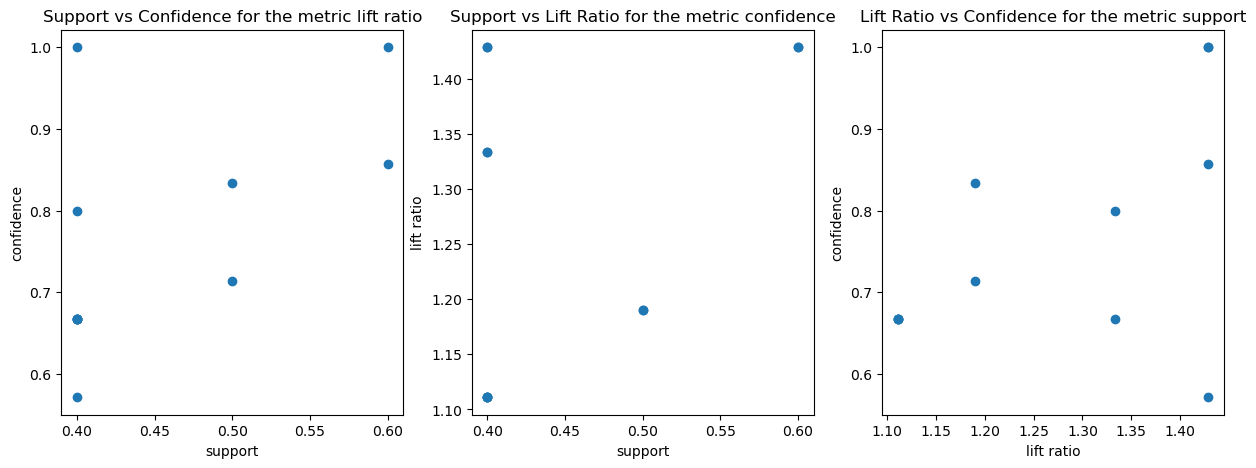

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(rules_l['support'], rules_l['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence for the metric lift ratio')
plt.subplot(132)
plt.scatter(rules_c['support'], rules_c['lift'])
plt.xlabel('support')
plt.ylabel('lift ratio')
plt.title('Support vs Lift Ratio for the metric confidence')
plt.subplot(133)
plt.scatter(rules_s['lift'], rules_s['confidence'])
plt.xlabel('lift ratio')
plt.ylabel('confidence')
plt.title('Lift Ratio vs Confidence for the metric support')
plt.show()

# APRIORI ALGORITHM

## for minimum support 0.4

In [14]:
# gives all the items sets
frequent_sets=apriori(movies,min_support=0.4,use_colnames=True)
frequent_sets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Sixth Sense, Gladiator)"


In [15]:
frequent_sets.shape

(7, 2)

# ASSOCIATION RULES

## With lift ratio

In [16]:
rules_l=association_rules(frequent_sets,metric='lift',min_threshold=1)
rules_l.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
11,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


### best association rule with lift ratio metric

*Among 4,5,8,9 which have same lift ratio, so we check for confidence 5 & 8 have same confidence,* 
* **buys(X,(Patriot)) => buys(X,(Gladiator))** has highest support.

*Hence, **5 is the best association rule**  among 4,5,8 & 9*

### 2nd best association rule with lift ratio metric 

*Among 7 & 10 which has same lift ratio,* 
* **buys(X,(Gladiator, Sixth Sense)) => buys(X,(Patriot))** has highest confidence.

*Hence, **7 is the best association rule**  among 7 & 10*

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With confidence

In [17]:
rules_c=association_rules(frequent_sets,metric='confidence',min_threshold=0.6)
rules_c.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


### best association rule with 'confidence' metric

*Among 5,8 which have same confidence,* 
* **buys(X,(Patriot)) => buys(X,(Gladiator))** has highest support.

**Hence,5 is the best association rule** 

### 2nd best association rule with 'confidence' metric 
 
* **buys(X,(Gladiator)) => buys(X,(Patriot))** has highest confidence.

**Hence,4 is the best association rule**

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With Support metric

In [18]:
rules_s=association_rules(frequent_sets,metric='support',min_threshold=0.3)
rules_s.sort_values('support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


### best association rule with support metric

*Among 4 & 5 which has same support,* 
* **buys(X,(Patriot)) => buys(X,(Gladiator))** has highest confidence.*

*Hence, **3 is the best association rule**  among 2 & 3*

### 2nd best association rule with support metric 

*Among 0 & 1 which has same support,* 
* **buys(X,(Sixth Sense)) => buys(X,(Gladiator))** has highest confidence.

*Hence, **1 is the best association rule**  among 0 & 1*

### Similarly, the association rules are choosen

# VISUALIZATION 

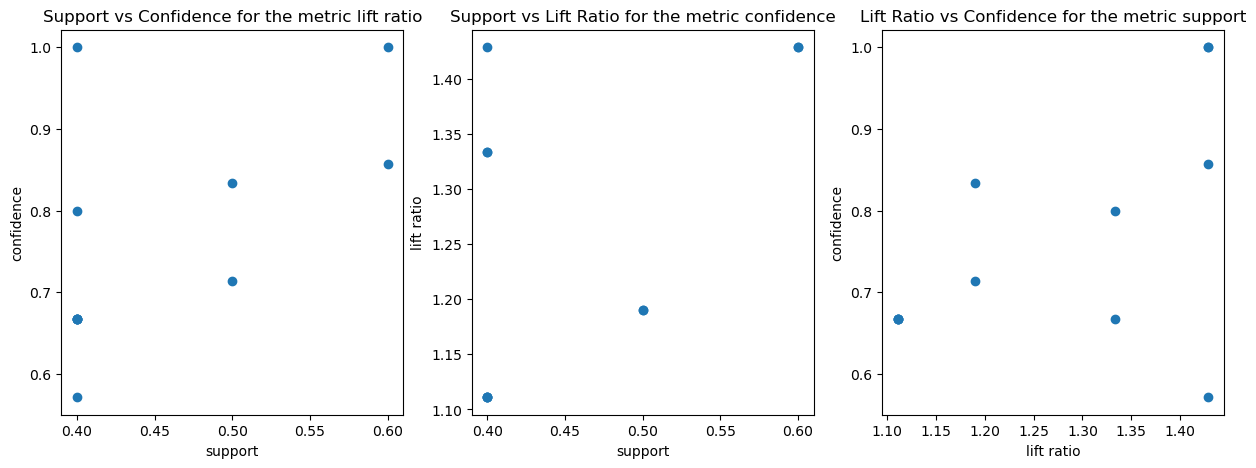

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(rules_l['support'], rules_l['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence for the metric lift ratio')
plt.subplot(132)
plt.scatter(rules_c['support'], rules_c['lift'])
plt.xlabel('support')
plt.ylabel('lift ratio')
plt.title('Support vs Lift Ratio for the metric confidence')
plt.subplot(133)
plt.scatter(rules_s['lift'], rules_s['confidence'])
plt.xlabel('lift ratio')
plt.ylabel('confidence')
plt.title('Lift Ratio vs Confidence for the metric support')
plt.show()